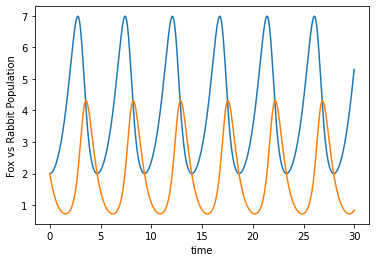

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def rab(y,x,t):
    return alpha*x - beta*x*y

def fox(y,x,t):
    return gamma*x*y - delta*y

a = 0 # alpha 
b = 30 # end point
N = 1000 # number of steps
h = (b-a)/N # step size

alpha = 1
beta = gamma = 0.5
delta = 2

x = y = 2 # inital conditions 

tpoints = np.arange(a,b,h)

rab_solution = [] # empty solution aray for rabbits
fox_solution = [] # empty solution array for foxes

for t in tpoints:
    rab_solution.append(x)
    
    k1 = h*rab(y,x,t)
    k2 = h*(rab(y, x + 0.5*k1, t + 0.5*h))
    k3 = h*(rab(y, x + 0.5*k2, t + 0.5*h))
    k4 = h*(rab(y, x + k3, t + h))
    ## k values found with the following website: https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/ ##
    x += k4
    
    fox_solution.append(y)
    
    fk1 = h*fox(y,x,t)
    fk2 = h*(fox(y + 0.5*fk1, x, t + 0.5*h))
    fk3 = h*(fox(y + 0.5*fk2, x, t + 0.5*h))
    fk4 = h*(fox(y + fk3, x, t + h))
    ## k values found with the following website: https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/ ##
    y += fk4


fig = plt.figure()
ax =  fig.add_subplot(111)
ax.plot(tpoints, rab_solution)
ax.plot(tpoints, fox_solution)
ax.set_xlabel("time")
ax.set_ylabel("Fox vs Rabbit Population")
fig.savefig('foxvsrab.png')